In [1]:
#!/usr/bin/env python3

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats

In [3]:
playerdata = pd.read_csv('d2_playercount.csv', index_col='DateTime')
playerdata.index = pd.to_datetime(playerdata.index)
playerdata = playerdata.between_time('00:00','00:00')

In [4]:
playerdata_byexpansion = {}
logdata_byexpansion = {}

In [5]:
expansion_releases = { 'Shadowkeep': '2019-10-01',
                      'Beyond Light': '2020-11-10',
                      'Witch Queen': '2022-02-22',
                      'Lightfall': '2023-02-28',
                      'The Final Shape': '2024-06-04',
                      'Edge of Fate' : '2025-07-15'
                      }

In [6]:
season_releases = {'Undying': '2019-10-01',
                   'Dawn': '2019-12-10',
                   'Worthy': '2020-03-10',
                   'Arrivals': '2020-06-09',
                   'Hunt': '2020-11-10',
                   'Chosen': '2021-02-09',
                   'Unsunsetting': '2021-02-25',
                   'Splicer': '2021-05-11',
                   'Lost': '2021-08-24',
                   '30th Pack': '2021-12-07',
                   'Risen': '2022-02-22',
                   'Iron Lagger R1': '2022-03-15',
                   'GG 2022': '2022-05-03',
                   'Haunted': '2022-05-24',
                   'Sony Purchase': '2022-07-16',
                   'Plunder': '2022-08-23',
                   'Seraph': '2022-12-06',
                   'Defiance': '2023-02-28',
                   'Fiscal Year Ends': '2023-03-31',
                   'GG 2023': '2023-05-02',
                   'Deep': '2023-05-22',
                   'Solstice 2023': '2023-07-18',
                   'Witch': '2023-08-22',
                   'FOTL 2023': '2023-10-17',
                   'Mass Layoffs': '2023-10-30',
                   'Wish': '2023-11-28',
                   'Dawning 2023': '2023-12-12',
                   'GG 2024': '2024-03-05',
                   'Echoes I': '2024-06-04',
                   'Iron Lagger E1': '2024-07-02',
                   'Echoes II': '2024-07-16',
                   'Echoes III': '2024-08-27',
                   'Sword Week': '2024-09-03',
                   'Revenant I': '2024-10-08'
                   }

In [7]:
seasons_byexpansion = {'Shadowkeep': ['Undying', 'Dawn', 'Worthy', 'Arrivals'],
                       'Beyond Light': ['Hunt', 'Chosen', 'Unsunsetting', 'Splicer', 'Lost', '30th Pack'],
                       'Witch Queen': ['Risen', 'Iron Lagger R1', 'GG 2022', 'Haunted', 'Sony Purchase', 'Plunder', 'Seraph'],
                       'Lightfall': ['Defiance', 'Fiscal Year Ends', 'GG 2023', 'Deep', 'Solstice 2023', 'Witch', 'FOTL 2023', 'Mass Layoffs', 'Wish', 'Dawning 2023', 'GG 2024'],
                       'The Final Shape': ['Echoes I', 'Iron Lagger E1', 'Echoes II', 'Echoes III', 'Sword Week', 'Revenant I'],
                       'Edge of Fate' : []}

In [8]:
for k in expansion_releases.keys():
    expansion_releases[k] = pd.to_datetime(expansion_releases[k])

In [9]:
for k in season_releases.keys():
    season_releases[k] = pd.to_datetime(season_releases[k])

In [10]:
releasenames = list(expansion_releases.keys())
releasedates = list(expansion_releases.values())
playerdata = playerdata.rolling(window='7d', center=True, min_periods=1).mean()
for j in range(len(releasenames)):
    try:
        playerdata_byexpansion[releasenames[j]] = playerdata[releasedates[j]:releasedates[j+1]]
    except(IndexError):
        playerdata_byexpansion[releasenames[j]] = playerdata[releasedates[j]:]

layerdata['Players'].plot()

In [11]:
for k in playerdata_byexpansion.keys():
    playerdata_byexpansion[k] = playerdata_byexpansion[k].iloc[:-1]
    #logdata_byexpansion[k] = playerdata_byexpansion[k].map(lambda x: np.log2(x)).rolling(window='14d', center=True, min_periods=1).mean().rolling(window='14d', center=True, min_periods=1).mean()
    playerdata_byexpansion[k] = playerdata_byexpansion[k].rolling(window='7d', center=True, min_periods=1).mean()

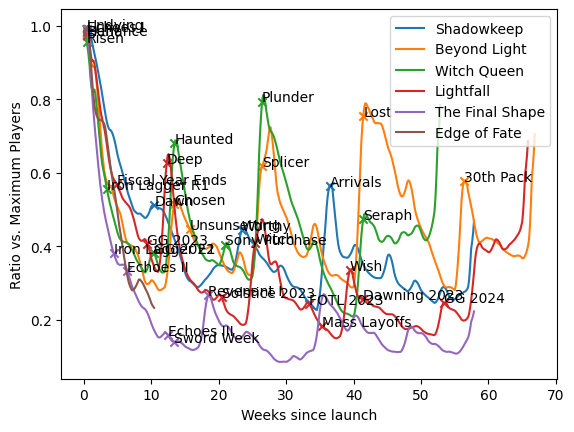

In [12]:
for k in playerdata_byexpansion.keys():
    startdate = playerdata_byexpansion[k].index[0]
    p = plt.plot((playerdata_byexpansion[k].index-startdate)/pd.to_timedelta(1,unit='W'), playerdata_byexpansion[k]['Players']/np.amax(playerdata_byexpansion[k]['Players']), label=k)
    clr = p[0].get_color()
    for s in seasons_byexpansion[k]:
        sdate = season_releases[s]+pd.to_timedelta(3, unit='D')
        spop = playerdata_byexpansion[k]['Players'][sdate]
        sx = (sdate-startdate)/pd.to_timedelta(1, unit='W')
        sy = spop/np.amax(playerdata_byexpansion[k]['Players'])
        plt.scatter([sx],[sy], marker='x', color=clr)
        plt.text(sx, sy, s)

plt.ylabel('Ratio vs. Maximum Players')
plt.xlabel('Weeks since launch')
plt.legend()

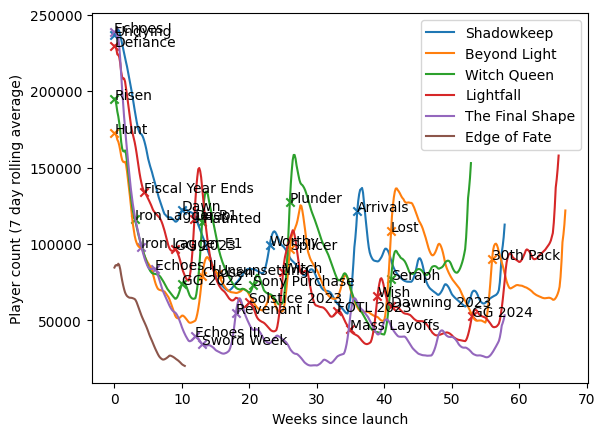

In [13]:
plt.figure()
for k in playerdata_byexpansion.keys():
    startdate = playerdata_byexpansion[k].index[0]
    p = plt.plot((playerdata_byexpansion[k].index-startdate)/pd.to_timedelta(1,unit='W'), playerdata_byexpansion[k]['Players'], label=k)
    clr = p[0].get_color()
    for s in seasons_byexpansion[k]:
        sdate = season_releases[s] #+pd.to_timedelta(3, unit='D')
        spop = playerdata_byexpansion[k]['Players'][sdate]
        sx = (sdate-startdate)/pd.to_timedelta(1, unit='W')
        sy = spop
        plt.scatter([sx],[sy], marker='x', color=clr)
        plt.text(sx, sy, s)

plt.ylabel('Player count (7 day rolling average)')
plt.xlabel('Weeks since launch')
plt.legend()

0.8442773792280913


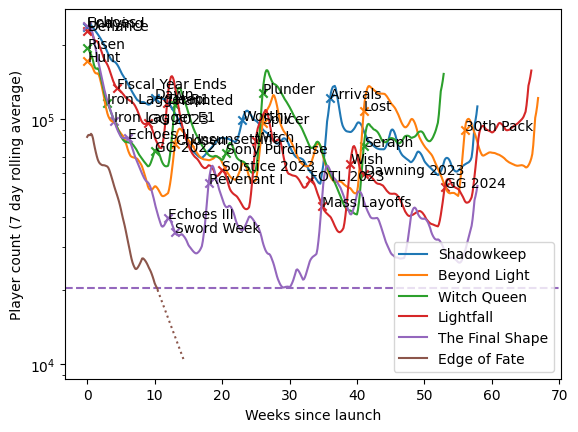

In [14]:
plt.figure()
for k in playerdata_byexpansion.keys():
    startdate = playerdata_byexpansion[k].index[0]
    p = plt.semilogy((playerdata_byexpansion[k].index-startdate)/pd.to_timedelta(1,unit='W'), playerdata_byexpansion[k]['Players'], label=k)
    clr = p[0].get_color()
    if(k == 'The Final Shape'):
        mincount = np.amin(playerdata_byexpansion[k]['Players'])
        plt.axhline(mincount, color=clr, linestyle='dashed')
    if(k == 'Edge of Fate'):
        enddate = playerdata_byexpansion[k].index[-1]
        lastweek_frame = playerdata_byexpansion[k][enddate-pd.to_timedelta(1,unit='W'):enddate].copy()
        #https://stackoverflow.com/a/58503526
        lastweek_frame['date_ordinal'] = (lastweek_frame.index-startdate)/pd.to_timedelta(1, unit='W')
        slope, intercept, r_value, p_value, std_err = stats.linregress(lastweek_frame['date_ordinal'], np.log10(lastweek_frame['Players']))
        print(np.pow(10,slope))
        endweek = (enddate-startdate)/pd.to_timedelta(1, unit='W')
        extrappoints = np.linspace(endweek, endweek+4, 28)
        plt.semilogy(extrappoints, np.pow(10,intercept+slope*extrappoints), color=clr, linestyle='dotted')
    for s in seasons_byexpansion[k]:
        sdate = season_releases[s] #+pd.to_timedelta(3, unit='D')
        spop = playerdata_byexpansion[k]['Players'][sdate]
        sx = (sdate-startdate)/pd.to_timedelta(1, unit='W')
        sy = spop
        plt.scatter([sx],[sy], marker='x', color=clr)
        plt.text(sx, sy, s)

plt.ylabel('Player count (7 day rolling average)')
plt.xlabel('Weeks since launch')
plt.legend()

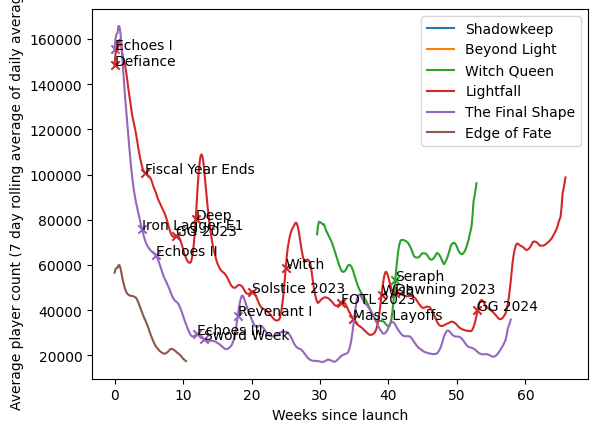

In [15]:
plt.figure()
for k in playerdata_byexpansion.keys():
    startdate = playerdata_byexpansion[k].index[0]
    p = plt.plot((playerdata_byexpansion[k].index-startdate)/pd.to_timedelta(1,unit='W'), playerdata_byexpansion[k]['Average Players'], label=k)
    clr = p[0].get_color()
    for s in seasons_byexpansion[k]:
        sdate = season_releases[s] #+pd.to_timedelta(3, unit='D')
        spop = playerdata_byexpansion[k]['Average Players'][sdate]
        sx = (sdate-startdate)/pd.to_timedelta(1, unit='W')
        sy = spop
        plt.scatter([sx],[sy], marker='x', color=clr)
        plt.text(sx, sy, s)

plt.ylabel('Average player count (7 day rolling average of daily average)')
plt.xlabel('Weeks since launch')
plt.legend()

0.8451766641017334


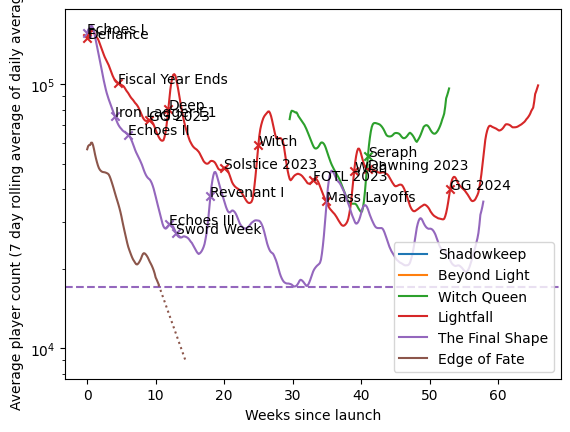

In [16]:
plt.figure()
for k in playerdata_byexpansion.keys():
    startdate = playerdata_byexpansion[k].index[0]
    p = plt.semilogy((playerdata_byexpansion[k].index-startdate)/pd.to_timedelta(1,unit='W'), playerdata_byexpansion[k]['Average Players'], label=k)
    clr = p[0].get_color()
    if(k == 'The Final Shape'):
        mincount = np.amin(playerdata_byexpansion[k]['Average Players'])
        plt.axhline(mincount, color=clr, linestyle='dashed')
    if(k == 'Edge of Fate'):
        enddate = playerdata_byexpansion[k].index[-1]
        lastweek_frame = playerdata_byexpansion[k][enddate-pd.to_timedelta(1,unit='W'):enddate].copy()
        #https://stackoverflow.com/a/58503526
        lastweek_frame['date_ordinal'] = (lastweek_frame.index-startdate)/pd.to_timedelta(1, unit='W')
        slope, intercept, r_value, p_value, std_err = stats.linregress(lastweek_frame['date_ordinal'], np.log10(lastweek_frame['Average Players']))
        print(np.pow(10,slope))
        endweek = (enddate-startdate)/pd.to_timedelta(1, unit='W')
        extrappoints = np.linspace(endweek, endweek+4, 28)
        plt.semilogy(extrappoints, np.pow(10,intercept+slope*extrappoints), color=clr, linestyle='dotted')
    for s in seasons_byexpansion[k]:
        sdate = season_releases[s] #+pd.to_timedelta(3, unit='D')
        spop = playerdata_byexpansion[k]['Average Players'][sdate]
        sx = (sdate-startdate)/pd.to_timedelta(1, unit='W')
        sy = spop
        plt.scatter([sx],[sy], marker='x', color=clr)
        plt.text(sx, sy, s)

plt.ylabel('Average player count (7 day rolling average of daily average)')
plt.xlabel('Weeks since launch')
plt.legend()

In [17]:
if(0):
    plt.figure()
    for k in playerdata_byexpansion.keys():
        startdate = playerdata_byexpansion[k].index[0]
        timeaxis = (playerdata_byexpansion[k].index-startdate)/pd.to_timedelta(1,unit='W')
        p = plt.plot(timeaxis, logdata_byexpansion[k]['Players'].rolling(window='14d', center=True, min_periods=1).mean().diff()/timeaxis.diff(), label=k)

    plt.axhline(y=0, color='k', alpha=0.5)
    plt.ylabel('Player count delta per week (heavily filtered)')
    plt.xlabel('Weeks since launch')
    plt.legend()

In [18]:
plt.show()